# Make a GMT using EPSG:4326

Download https://www.gns.cri.nz/assets/Data-and-Resources/Download-files/Community-Hazard-Model/NZ_CFM_v1_0_shapefile.zip 

Uncompress NZ_CFM_v1_0_shapefile.zip, and open QGIS.

Load NZ_CFM_v1_0.shp, and export an ESRI shapefile using CRS EPSG:4326.

Convert to a GMT format using ogr2ogr. 
```
ogr2ogr -f GMT CFM_CRS4326.gmt CFM_CRS4326.shp
```





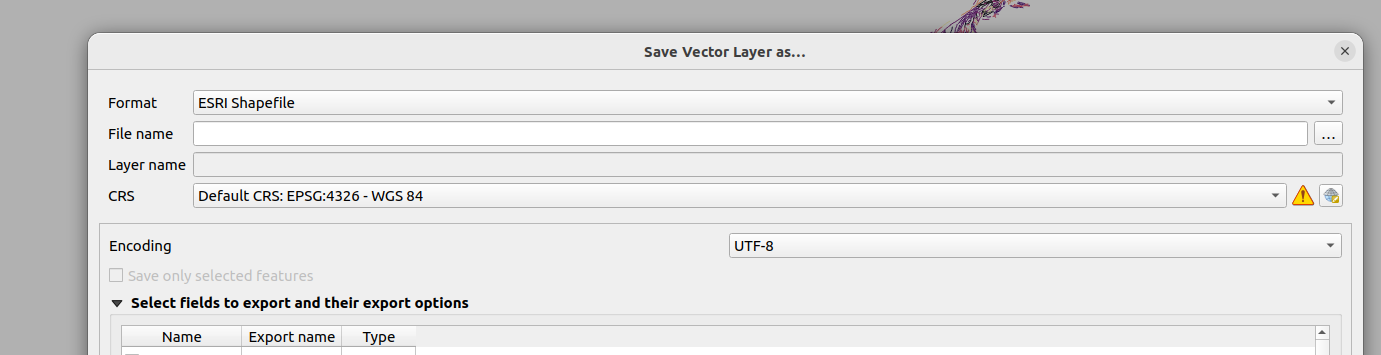

In [2]:
keys = ["object_id", "fault_id", "name", "name_stat", "lineage", "fault_stat", "domain_name", "domain_no", 
                 "dip_pref", "dip_min", "dip_max", "dip_dir", 
                 "dom_sense", "sub_sense", 
                 "rake_pref", "rake_minus", "rake_plus", 
                 "sr_pref", "sr_min", "sr_max",
                 "srt_pref", "srt_min", "srt_max", "srt_gen", 
                 "upd_dpt_prf", "upd_dth_min", "upd_dth_max", 
                 "depth_dfc", "method_dfc", 
                 "depth_d90", "method_d90", 
                 "qual_code", "references", "comments", "compiled_by", "last_update"]
      

In [3]:
faults=[]
with open("CFM_CRS4326.gmt","r") as f:
    lines=f.read().split("\n")
    fault_segments={}
    i = 0
    while i < len(lines):
        #print(i)
        if lines[i].startswith("# @D"):
            attributes=lines[i].split("|")
            object_id = int(attributes[0].split("@D")[1])
            attributes[0]=object_id
            double_idxs=[1,7,8,9,10,14,15,16,17,18,19,24,25,26,27,28,29,30,31]
            for didx in double_idxs:
                attributes[didx] = float(attributes[didx])
            seg_start=i+1
            j = seg_start
            fault_segments[object_id]=[]
            while j<len(lines) and not lines[j].startswith(">") and len(lines[j])>0:
                try:
                    lon,lat=[float(x) for x in lines[j].split()]
                except ValueError:
                    print(object_id)
                    print(lines[j]) # \n"|||
                else:
                    fault_segments[object_id].append((lon,lat))
                j+=1
            #print(attributes)
            #print(list(zip(range(len(attributes)),attributes)))
            #print(len(keys))
            #print(len(attributes))
            fault=dict(zip(keys,attributes))
            fault['traces']=fault_segments[object_id]
            faults.append(fault)
#             try:
#                 faults.append(dict(zip(keys, attributes.)))
#             except TypeError:
#                 print(attributes)
            i = j + 1
        else:
            i = i + 1
            
            
            

232
\n"|||
233
\n"|||


In [4]:
fault_segments

{1: [(172.21426187056, -42.3553906881629),
  (172.013355209047, -42.474133462663),
  (171.612, -42.6583000009029),
  (171.447925023275, -42.7342705666606),
  (171.277928113635, -42.8112192760248),
  (171.146420361664, -42.8913917571617)],
 2: [(173.343021527871, -42.0259096333608),
  (173.093956801844, -42.1068583266471),
  (172.937443045942, -42.1260909229963),
  (172.881122614782, -42.1317669464986),
  (172.774628927388, -42.1564008100896),
  (172.651183983852, -42.2279437173462),
  (172.480157756587, -42.3039405993115),
  (172.309432865972, -42.3396911756594),
  (172.21426187056, -42.3553906881629)],
 3: [(173.194743785582, -42.0988595743013),
  (173.178000000306, -42.1150000001493),
  (173.128000000226, -42.1933),
  (173.116786810887, -42.2460113525384)],
 4: [(171.533421440685, -42.8127372245371),
  (171.510673741215, -42.8301284887933),
  (171.47, -42.8867000004248),
  (171.406999999716, -42.9050000001012),
  (171.373, -42.9350000002604),
  (171.302, -42.9667000004711),
  (171.25

In [5]:
faults

[{'object_id': 1,
  'fault_id': 597.0,
  'name': '"Alpine: Kaniere to Springs Junction"',
  'name_stat': 'published',
  'lineage': 'Unmodified',
  'fault_stat': 'A-LS',
  'domain_name': '"Alpine Fault"',
  'domain_no': 15.0,
  'dip_pref': 60.0,
  'dip_min': 40.0,
  'dip_max': 60.0,
  'dip_dir': 'SE',
  'dom_sense': '"dextral and reverse"',
  'sub_sense': '',
  'rake_pref': 135.0,
  'rake_minus': 115.0,
  'rake_plus': 155.0,
  'sr_pref': 15.0,
  'sr_min': 13.0,
  'sr_max': 17.0,
  'srt_pref': '',
  'srt_min': '',
  'srt_max': '',
  'srt_gen': '"1000s yrs"',
  'upd_dpt_prf': 0.0,
  'upd_dth_min': 0.0,
  'upd_dth_max': 0.0,
  'depth_dfc': 23.4,
  'method_dfc': 1.0,
  'depth_d90': 19.4,
  'method_d90': 1.0,
  'qual_code': 1.0,
  'references': '"Litchfield et al. 2013, 2014; Howarth et al. 2018, 2021; Berryman et al. 1992; Yetton 1998, 2002; Langridge et al. 2010"',
  'comments': '',
  'compiled_by': '',
  'last_update': '',
  'traces': [(172.21426187056, -42.3553906881629),
   (172.0133552

In [6]:
dict(zip([1,2,3,4],[5,6,7,8]))

{1: 5, 2: 6, 3: 7, 4: 8}

In [7]:
import pandas as pd
faults_df=pd.DataFrame.from_records(faults,index='object_id')

In [8]:
faults_df.to_csv("CFM.csv")

In [9]:
with open("NZ_FLTmodel_2010_v18p6.txt","r") as f:
    lines = f.readlines()

    

In [10]:
cols = ['fault_name',
        'tectonic_type','fault_type',
        'length_mean','length_signa',
        'dip_mean','dip_sigma',
        'dip_dir',
        'rake',
        'rup_depth_mean','rup_depth_sigma',
        'rup_top_mean','rup_top_min','rup_top_max',
        'slip_rate_mean','slip_rate_sigma',
        'coupling_coeff','coupling_coeff_sigma',
        'mw_median','recur_int_median',
        'num_locations_on_fault_surface']
        

In [11]:
lines[31]

'\n'

In [12]:
nhm2010_faults=[]
begin = 15
while begin < len(lines):
    end = begin + 1
    while end + 1 < len(lines):
        if len(lines[end+1].strip("\n"))==0:
            break
        else:
            end += 1
    columns = []
    for i in range(begin,end+1):
        one_line = lines[i].strip("\n") #split(lines[begin:end+1])
        columns.extend(one_line.split())
    vals = columns[:len(cols)]
    new_vals = []
    for val in vals:
        try:
            new_vals.append(float(val))
        except ValueError:
            new_vals.append(val)
            
    coords = columns[len(cols):]
    num_coords = int(len(coords) / 2)
    traces = [(float(coords[2*i]),float(coords[2*i+1])) for i in range(num_coords)]
    #print(vals, len(vals), traces,len(traces))
    fault_dict=dict(zip(cols,new_vals))
    fault_dict['num_locations_on_fault_surface'] = int(fault_dict['num_locations_on_fault_surface'])
    fault_dict['traces']= traces
    #print(fault_dict)
    begin = end + 2
    if fault_dict['rup_top_mean'] > 0:
        print(f"{fault_dict['fault_name']}, {fault_dict['rup_depth_mean']}, {fault_dict['rup_top_mean']}, {fault_dict['rup_top_min']}, {fault_dict['rup_top_max']}")

BrunAnt, 12.0, 0.1, 0.0, 1.1
Cust, 12.0, 1.0, 0.0, 2.0
FeildingAnt, 15.0, 1.0, 0.0, 2.0
FiordSZ09, 30.0, 10.0, 9.0, 11.0
HikHBaymax, 20.0, 5.0, 4.0, 6.0
HikHBaymin, 15.0, 5.0, 4.0, 6.0
HikRaukmax, 20.0, 5.0, 4.0, 6.0
HikRaukmin, 15.0, 5.0, 4.0, 6.0
HikWgtnmax, 30.0, 5.0, 4.0, 6.0
HikWgtnmin, 25.0, 15.0, 14.0, 16.0
HimatangiAnt, 15.0, 1.0, 0.0, 2.0
LevinAnt, 15.0, 1.0, 0.0, 2.0
MartonAnt, 15.0, 1.0, 0.0, 2.0
MtStew, 15.0, 1.0, 0.0, 2.0
PohanginaAnt, 15.0, 1.0, 0.0, 2.0
Poroutawhao, 15.0, 1.0, 0.0, 2.0
Springbank, 12.0, 1.0, 0.0, 2.0


In [13]:
dip_dir_degs=list(range(0,360,45))
dip_dir_strs=['N','NE','E','SE','S','SW','W','NW']
dip_dir_dict=dict(zip(dip_dir_strs,dip_dir_degs))

In [14]:
import sys
sys.path.append("/Users/sungbae/qcore")
import numpy as np
from qcore import geo
def get_fault_header_points(traces, dbottom, dtop, dip, dip_dir_str):
    srf_points = []
    lon1, lat1 = traces[0]
    lon2, lat2 = traces[1]
    strike = geo.ll_bearing(lon1, lat1, lon2, lat2, midpoint=True)
    
    try:
        dip_dir = dip_dir_dict[dip_dir_str]
    except KeyError:
        print(f"KeyError: {dip_dir_str}")
        return []
    

    if 180 > dip_dir - strike >= 0:
        # If the dipdir is not to the right of the strike, turn the fault around
        indexes = range(len(traces))
    else:
        indexes = range(len(traces) - 1, -1, -1)

    for i, i2 in zip(indexes[:-1], indexes[1:]):
        lon1, lat1 = traces[i]
        lon2, lat2 = traces[i2]

        height = dbottom - dtop
        width = abs(height / np.tan(np.deg2rad(dip)))

        bot_lat1, bot_lon1 = geo.ll_shift(lat1, lon1, width, dip_dir)
        bot_lat2, bot_lon2 = geo.ll_shift(lat2, lon2, width, dip_dir)

        acc = 4

        srf_points.append(
            [
                [round(lat1, acc), round(lon1, acc)],
                [round(lat2, acc), round(lon2, acc)],
                [round(bot_lat2, acc), round(bot_lon2, acc)],
                [round(bot_lat1, acc), round(bot_lon1, acc)],
            ]
        )

    return srf_points

In [15]:
faults_df = None
faults_df=pd.read_csv("CFM.csv")

In [16]:
faults_df

object_id  fault_id                                   name  name_stat  \
0            1     597.0  "Alpine: Kaniere to Springs Junction"  published   
1            2     541.0                   "Awatere: Southwest"  published   
2            3     580.0                               Barefell  published   
3            4     595.0                        "Browning Pass"  published   
4            6     677.0                              Cheeseman  published   
..         ...       ...                                    ...        ...   
875        879     525.0                       "Kohaihai South"  published   
876        880     626.0                        "Leader: South"  published   
877        881     624.0                        "Leader: North"  published   
878        882     470.0                              Hikurangi  published   
879        883      28.0                                  Warea   informal   

        lineage fault_stat                   domain_name  domain_no  dip_pref  \
0    Unmodified       A-LS                "Alpine Fault"       15.0      60.0   
1      Modified       A-LS    "Marlborough Fault System"       14.0      75.0   
2      Modified       A-LS    "Marlborough Fault System"       14.0      60.0   
3      Modified       A-LS    "Marlborough Fault System"       14.0      60.0   
4      Modified       A-LS          "Central Canterbury"       18.0      60.0   
..          ...        ...                           ...        ...       ...   
875         New       N-PS   "Northwestern South Island"       13.0      70.0   
876         New       A-LS     "Northeastern Canterbury"       17.0      55.0   
877         New       A-LS     "Northeastern Canterbury"       17.0      55.0   
878    Modified       A-LS  "Hikurangi subduction front"       10.0       0.0   
879         New       N-PS        "western North Island"        3.0      60.0   

     dip_min  ...  depth_dfc method_dfc depth_d90 method_d90  qual_code  \
0       40.0  ...       23.4        1.0      19.4        1.0        1.0   
1       60.0  ...       28.5        1.0      23.7        1.0        1.0   
2       50.0  ...       28.9        1.0      24.5        1.0        3.0   
3       50.0  ...       12.5        3.0      12.5        3.0        3.0   
4       45.0  ...       18.8        1.0      13.6        1.0        3.0   
..       ...  ...        ...        ...       ...        ...        ...   
875     60.0  ...       27.6        1.0      24.8        1.0        3.0   
876     40.0  ...       27.6        1.0      21.4        1.0        3.0   
877     40.0  ...       25.8        1.0      20.0        1.0        3.0   
878      0.0  ...        0.0        2.0       0.0        2.0        5.0   
879     45.0  ...       26.5        1.0      21.5        1.0        3.0   

                                            references  \
0    "Litchfield et al. 2013, 2014; Howarth et al. ...   
1             "McCalpin 1992, 1996; Zinke et al. 2017"   
2                              "Mason and Little 2006"   
3    "Becker and Craw 2000; Litchfield et al. 2013,...   
4    "Barrell 2013; Cox and Barrell 2007; Pettinga ...   
..                                                 ...   
875  "Nathan et al. 2002; Ghisetti, Sibson and Haml...   
876  "Goded et al. 2018; Litchfield et al. 2018; Ni...   
877  "Barrell and Townsend 2012; Goded et al. 2018;...   
878                          "Seebeck CFM compilation"   
879                              "Seebeck et al. 2021"   

                                              comments  \
0                                                  NaN   
1    "Linework modified to intersect Shingle Peak. ...   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
875           "added from  Ghisetti et al. CFM update"   
876                              

In [17]:
faults_df.iloc[0]

object_id                                                      1
fault_id                                                   597.0
name                       "Alpine: Kaniere to Springs Junction"
name_stat                                              published
lineage                                               Unmodified
fault_stat                                                  A-LS
domain_name                                       "Alpine Fault"
domain_no                                                   15.0
dip_pref                                                    60.0
dip_min                                                     40.0
dip_max                                                     60.0
dip_dir                                                       SE
dom_sense                                  "dextral and reverse"
sub_sense                                                    NaN
rake_pref                                                  135.0
rake_minus               

In [18]:
import re

def traces_reformat(raw_traces):
    # define the regex pattern to match the coordinates
    pattern = r"\((-?\d+\.\d+), (-?\d+\.\d+)\)"

    # read the string from the file or assign it to a variable
    string = "(172.21426187056, -42.3553906881629), (172.013355209047, -42.474133462663), (171.612, -42.6583000009029), (171.447925023275, -42.7342705666606), (171.277928113635, -42.8112192760248), (171.146420361664, -42.8913917571617)"

    # find all matches of the pattern in the string and convert them into a list of tuples
    traces = [(float(match.group(1)), float(match.group(2))) for match in re.finditer(pattern, raw_traces)]

    return traces

faults_df.iloc[0].traces
traces_reformat(faults_df.iloc[0].traces)

[(172.21426187056, -42.3553906881629),
 (172.013355209047, -42.474133462663),
 (171.612, -42.6583000009029),
 (171.447925023275, -42.7342705666606),
 (171.277928113635, -42.8112192760248),
 (171.146420361664, -42.8913917571617)]

In [19]:
faults_df.iloc[0]

object_id                                                      1
fault_id                                                   597.0
name                       "Alpine: Kaniere to Springs Junction"
name_stat                                              published
lineage                                               Unmodified
fault_stat                                                  A-LS
domain_name                                       "Alpine Fault"
domain_no                                                   15.0
dip_pref                                                    60.0
dip_min                                                     40.0
dip_max                                                     60.0
dip_dir                                                       SE
dom_sense                                  "dextral and reverse"
sub_sense                                                    NaN
rake_pref                                                  135.0
rake_minus               

In [20]:
all_planes = []
for i in range(len(faults_df)):
    f = faults_df.iloc[i]
    try:
        planes=get_fault_header_points(traces_reformat(f.traces),f.depth_d90,f.upd_dpt_prf,f.dip_pref,f.dip_dir)
    except ValueError:
        print(f.object_id, f.name, f.traces)
    all_planes.append(planes)
faults_df['planes']=all_planes

KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"
KeyError: "Subvertical and variable"


/tmp/ipykernel_1412955/1184247954.py:29: RuntimeWarning: invalid value encountered in double_scalars
  width = abs(height / np.tan(np.deg2rad(dip)))


In [21]:
faults_df

object_id  fault_id                                   name  name_stat  \
0            1     597.0  "Alpine: Kaniere to Springs Junction"  published   
1            2     541.0                   "Awatere: Southwest"  published   
2            3     580.0                               Barefell  published   
3            4     595.0                        "Browning Pass"  published   
4            6     677.0                              Cheeseman  published   
..         ...       ...                                    ...        ...   
875        879     525.0                       "Kohaihai South"  published   
876        880     626.0                        "Leader: South"  published   
877        881     624.0                        "Leader: North"  published   
878        882     470.0                              Hikurangi  published   
879        883      28.0                                  Warea   informal   

        lineage fault_stat                   domain_name  domain_no  dip_pref  \
0    Unmodified       A-LS                "Alpine Fault"       15.0      60.0   
1      Modified       A-LS    "Marlborough Fault System"       14.0      75.0   
2      Modified       A-LS    "Marlborough Fault System"       14.0      60.0   
3      Modified       A-LS    "Marlborough Fault System"       14.0      60.0   
4      Modified       A-LS          "Central Canterbury"       18.0      60.0   
..          ...        ...                           ...        ...       ...   
875         New       N-PS   "Northwestern South Island"       13.0      70.0   
876         New       A-LS     "Northeastern Canterbury"       17.0      55.0   
877         New       A-LS     "Northeastern Canterbury"       17.0      55.0   
878    Modified       A-LS  "Hikurangi subduction front"       10.0       0.0   
879         New       N-PS        "western North Island"        3.0      60.0   

     dip_min  ...  method_dfc depth_d90 method_d90 qual_code  \
0       40.0  ...         1.0      19.4        1.0       1.0   
1       60.0  ...         1.0      23.7        1.0       1.0   
2       50.0  ...         1.0      24.5        1.0       3.0   
3       50.0  ...         3.0      12.5        3.0       3.0   
4       45.0  ...         1.0      13.6        1.0       3.0   
..       ...  ...         ...       ...        ...       ...   
875     60.0  ...         1.0      24.8        1.0       3.0   
876     40.0  ...         1.0      21.4        1.0       3.0   
877     40.0  ...         1.0      20.0        1.0       3.0   
878      0.0  ...         2.0       0.0        2.0       5.0   
879     45.0  ...         1.0      21.5        1.0       3.0   

                                            references  \
0    "Litchfield et al. 2013, 2014; Howarth et al. ...   
1             "McCalpin 1992, 1996; Zinke et al. 2017"   
2                              "Mason and Little 2006"   
3    "Becker and Craw 2000; Litchfield et al. 2013,...   
4    "Barrell 2013; Cox and Barrell 2007; Pettinga ...   
..                                                 ...   
875  "Nathan et al. 2002; Ghisetti, Sibson and Haml...   
876  "Goded et al. 2018; Litchfield et al. 2018; Ni...   
877  "Barrell and Townsend 2012; Goded et al. 2018;...   
878                          "Seebeck CFM compilation"   
879                              "Seebeck et al. 2021"   

                                              comments  \
0                                                  NaN   
1    "Linework modified to intersect Shingle Peak. ...   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
875           "added from  Ghisetti et al. CFM update"   
876                                                NaN   
877                                                NaN   
878  "Single line representation of the Hikurangi

In [22]:
faults_df.to_csv("CFM_with_planes.csv",index=False)

In [23]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [24]:
# import matplotlib.pyplot as plt
# %matplotlib inline
#plt.rcParams["figure.figsize"]=40,40
#plt.rcParams['figure.dpi'] = 200

import geopandas as gpd
from shapely.geometry import Polygon,LineString, LinearRing
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import folium
    
    
    


figure = folium.Figure(width=1500, height=1500)
grid_map = folium.Map(location=[-42.1,172.8], zoom_start=7, tiles='cartodbpositron')
grid_map.add_to(figure)
cfm_grid_fg = folium.FeatureGroup(name="CFMv1.0", overlay=True)

#LEN = 5


LEN = len(faults_df)
rng= np.random.default_rng(12345)
colors = [rng.integers(0,256,size=3) for _ in range(LEN)]

hex_colors = []
for color in colors:
    color = [str(hex(i))[2:] for i in color]
    color = '#'+''.join(color).upper()
    hex_colors.append(color)


# create map

for i in range(LEN):
    f=faults_df.iloc[i]
    traces=traces_reformat(f.traces)
    fault_lines = LineString(traces)
   
    color = 'red'
    folium.GeoJson(fault_lines,style_function=lambda x, color=color: {"color":color, "weight":1}).add_to(cfm_grid_fg)
    planes=f.planes
    object_id = f.object_id
    
    
    new_planes = []
    for plane in planes:
        new_plane = []
        for lat,lon in plane:
            new_plane.append([lon,lat])
        
        new_planes.append(new_plane)
    
    if len(new_planes) == 0:
        continue
        
    ring_coords=[]
    for j, plane in enumerate(new_planes):
        ring_coords=ring_coords[:j]+plane+ring_coords[-j:]
    
    ring_geom = Polygon(ring_coords)
    ring = gpd.GeoDataFrame(index=[object_id], crs='epsg:4326', geometry=[ring_geom])
    folium.GeoJson(ring,style_function=lambda x, i=i: {'fillColor': hex_colors[i],'color': hex_colors[i], "fillOpacity": 0.5,"weight":0.1 }, highlight_function=lambda feature: {"fillcolor": "yellow", "color":"green"}, name=f['domain_name'],tooltip=f"{f['name']} ({int(f.fault_id)})").add_to(cfm_grid_fg) #,
    

folium.LatLngPopup().add_to(grid_map)
cfm_grid_fg.add_to(grid_map)
folium.LayerControl(collapsed=True).add_to(grid_map)
grid_map

In [25]:
grid_map.save(outfile="CFMv1p0.html")

In [26]:
planes=[['a','b','i','j'],['b','c','h','i'],['c','d','g','h'],['d','e','f','g']]
ring_coords=[]
for i,plane in enumerate(planes):
    ring_coords=ring_coords[:i]+plane+ring_coords[-i:]
    print(i, ring_coords)
    



0 ['a', 'b', 'i', 'j']
1 ['a', 'b', 'c', 'h', 'i', 'j']
2 ['a', 'b', 'c', 'd', 'g', 'h', 'i', 'j']
3 ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


In [27]:
np.random.randint(0, 256, size=3)

array([182, 242,  26])